__pandas es una biblioteca de análisis de datos en Python__ que nos provee de las estructuras de datos y herramientas para realizar análisis de manera rápida. Se articula sobre la biblioteca NumPy y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales que requieren seguir un proceso de carga, limpieza, filtrado, reduccióń y análisis. 
En esta clase veremos como cargar y guardar datos, las características de las pricipales estructuras de pandas y las aplicaremos a algunos problemas.

In [93]:
# Importamos pandas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

C:\Users\jnieto\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [95]:
#vemos que muestra el fichero
# !head /data/tabernas_meteo_data.txt
df = pd.read_fwf('data/tabernas_meteo_data.txt') # fixed width format 
df.head()

,FECHA,DIA,Al04TMax,Al04TMin,Al04TMed,Al04Precip
0,--------,---,--------,--------,--------,----------
1,13-12-16,348,14.6,4.0,8.9,0.2
2,12-12-16,347,15.9,3.0,8.7,0.2
3,11-12-16,346,16.9,5.0,10.2,0.2
4,10-12-16,345,16.4,6.3,10.9,0.2


## Tratamos de cargarlo en pandas

In [96]:
pd.read_csv('data/tabernas_meteo_data.txt').head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,13-12-16 348 14.6 4.0 8.9 ...
2,12-12-16 347 15.9 3.0 8.7 ...
3,11-12-16 346 16.9 5.0 10.2 ...
4,10-12-16 345 16.4 6.3 10.9 ...


In [97]:
data = pd.read_csv(
    'data/tabernas_meteo_data.txt',
    delim_whitespace=True, # delimitar con espacios en blanco
    usecols=(0,2,3,4,5), # columnas que queremos usar
    skiprows=2, # saltar las dos primeras lineas
    names = ['DATE','TMAX','TMIN','TMED','PRECIP'], #colocar nombres a cada columna de las usecols
    parse_dates=['DATE'],
    # date_parser = lambda X:pd:datetime.strptime(x, '%d-%m-%y') , # parseo manual
    dayfirst=True, # Importante
    index_col=['DATE'] # indexar por fechas (Columna indice)
    )
data.sort_index(inplace=True)
data.head()

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-01,18.0,2.5,11.1,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-03,15.1,0.8,7.9,0.0
2004-01-04,16.2,-0.4,7.2,0.0
2004-01-05,16.4,0.6,7.1,0.0


In [98]:
# comprobar el tipo de datos de la columna
data.dtypes

TMAX      float64
TMIN      float64
TMED      float64
PRECIP    float64
dtype: object

In [99]:
# informacion general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2004-01-01 to 2016-12-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMAX    4713 non-null   float64
 1   TMIN    4713 non-null   float64
 2   TMED    4713 non-null   float64
 3   PRECIP  4713 non-null   float64
dtypes: float64(4)
memory usage: 184.8 KB


In [100]:
# descripcion estadistica de los datos
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,4713.000000,4713.000000,4713.000000,4713.000000
mean,23.224761,9.676872,16.276321,0.650583
std,7.318656,6.263303,6.638529,3.273346
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


In [101]:
# de la columna indice, extraerinformacion
data.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            6, 0, 1, 2, 3, 4, 5, 6, 0, 1],
           dtype='int64', name='DATE', length=4732)

## Accediendo a los datos

In [102]:
# Tenemos dos formas de acceder a los columnas: por nombre o por atributo

In [103]:
# por nombre
data['TMAX'].head()

DATE
2004-01-01    18.0
2004-01-02    17.4
2004-01-03    15.1
2004-01-04    16.2
2004-01-05    16.4
Name: TMAX, dtype: float64

In [104]:
# accediendo como atributo
data.TMAX.head()

DATE
2004-01-01    18.0
2004-01-02    17.4
2004-01-03    15.1
2004-01-04    16.2
2004-01-05    16.4
Name: TMAX, dtype: float64

In [105]:
# accediendo a varias columnas a la vez
data[['TMAX','TMIN']].head()

,TMAX,TMIN
DATE,,
2004-01-01,18.0,2.5
2004-01-02,17.4,5.7
2004-01-03,15.1,0.8
2004-01-04,16.2,-0.4
2004-01-05,16.4,0.6


In [106]:
# accediendo a varias columnas a la vez, a la vex diviendo entre 100
data[['TMAX','TMIN']].head()/100

,TMAX,TMIN
DATE,,
2004-01-01,0.180,0.025
2004-01-02,0.174,0.057
2004-01-03,0.151,0.008
2004-01-04,0.162,-0.004
2004-01-05,0.164,0.006


In [107]:
import numpy as np  
np.mean(data['TMAX'])

23.22476129853591

In [108]:
data.TMAX.mean() # otra forma

23.22476129853591

In [109]:
# accediendo a una fila por indice
data.iloc[1] # fila 1

TMAX      17.4
TMIN       5.7
TMED      10.6
PRECIP     0.0
Name: 2004-01-02 00:00:00, dtype: float64

In [110]:
# traer info desde una determinada fecha (seccion)
data.loc['2015-12-01':]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2015-12-01,19.7,1.9,9.5,0.2
2015-12-02,19.7,3.2,9.9,0.0
2015-12-03,18.3,4.7,10.8,0.0
2015-12-04,19.6,4.4,10.9,0.2
2015-12-05,18.3,4.7,10.0,0.0
...,...,...,...,...
2016-12-09,13.6,9.5,11.2,1.8
2016-12-10,16.4,6.3,10.9,0.2
2016-12-11,16.9,5.0,10.2,0.2


In [111]:
# Tambien puedo indexar utilizando valores booleanos,
# por ejemplo procedentes de la comprobacion de una condicion

In [112]:
data.loc[data.TMIN.isnull()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2005-08-21,NaN,NaN,NaN,NaN
2005-12-22,NaN,NaN,NaN,NaN
2006-01-28,NaN,NaN,NaN,NaN
2006-02-16,NaN,NaN,NaN,NaN
2006-05-11,NaN,NaN,NaN,NaN
2006-06-14,NaN,NaN,NaN,NaN
2007-04-19,NaN,NaN,NaN,NaN
2007-06-26,NaN,NaN,NaN,NaN
2007-12-20,NaN,NaN,NaN,NaN


In [113]:
# podemos agrupar nuestros datos utilizando groupby
data['year']  = data.index.year
data['month'] = data.index.month

In [114]:
# Creamos la agrupacion
monthly = data.groupby(by=['year','month'])

In [115]:
# Podemos ver los grupos que hemos creado
monthly.groups.keys()

dict_keys([(2004, 1), (2004, 2), (2004, 3), (2004, 4), (2004, 5), (2004, 6), (2004, 7), (2004, 8), (2004, 9), (2004, 10), (2004, 11), (2004, 12), (2005, 1), (2005, 2), (2005, 3), (2005, 4), (2005, 5), (2005, 6), (2005, 7), (2005, 8), (2005, 9), (2005, 10), (2005, 11), (2005, 12), (2006, 1), (2006, 2), (2006, 3), (2006, 4), (2006, 5), (2006, 6), (2006, 7), (2006, 8), (2006, 9), (2006, 10), (2006, 11), (2006, 12), (2007, 1), (2007, 2), (2007, 3), (2007, 4), (2007, 5), (2007, 6), (2007, 7), (2007, 8), (2007, 9), (2007, 10), (2007, 11), (2007, 12), (2008, 1), (2008, 2), (2008, 3), (2008, 4), (2008, 5), (2008, 6), (2008, 7), (2008, 8), (2008, 9), (2008, 10), (2008, 11), (2008, 12), (2009, 1), (2009, 2), (2009, 3), (2009, 4), (2009, 5), (2009, 6), (2009, 7), (2009, 8), (2009, 9), (2009, 10), (2009, 11), (2009, 12), (2010, 1), (2010, 2), (2010, 3), (2010, 4), (2010, 5), (2010, 6), (2010, 7), (2010, 8), (2010, 9), (2010, 10), (2010, 11), (2010, 12), (2011, 1), (2011, 2), (2011, 3), (2011, 4), 

In [116]:
# accedemos a un grupo
monthly.get_group((2016,3)).head()

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-01,20.5,0.0,9.9,0.0,2016,3
2016-03-02,23.5,2.9,13.6,0.0,2016,3
2016-03-03,20.9,2.9,12.5,0.0,2016,3
2016-03-04,20.3,2.0,12.6,0.0,2016,3
2016-03-05,17.3,7.1,12.5,0.0,2016,3


In [117]:
monthy_mean = monthly.mean()

In [118]:
# Dejar los años como indices y ver la media mensual en cada columna
monthly_mean = monthly.mean()
monthly_mean.reset_index().pivot(index='year',columns='month')

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.567742  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                   ...    PRECIP            \
month         7          8          9          10  ...        3         4    
year                                               ...                       
2004   31.664516  33.483871  30.066667  26.022581  ...  2.619355  3.233333   
2005   33.445161  32.193333  27.803333  23.900000  ...  0.858065  0.073333   
2006   33.900000  31.990323  28.633333  25.483871  ...  0.070968  1.960000   
2007   32.551613  31.764516  26.806667  21.919355  ...  0.625806  1.248276   
2008   32.596774  32.380645  27.343333  21.548387  ...  0.464516  0.120000   
2009   34.964516  32.367742  26.363333  25.945161  ...  1.425806  0.720000   
2010   33.070968  33.067742  28.726667  23.980645  ...  2.548387  0.486667   
2011   32.977419  33.687097  28.870000  24.216129  ...  1.012903  0.993333   
2012   32.880645  35.754545  28.106667  23.506452  ...  0.025806  0.013333   
2013   31.841935  31.716129  28.016667  26.603226  ...  1.141935  0.373333   
2014   32.154839  32.645161  29.603333  25.287097  ...  0.122581  0.013333   
2015   35.174194  32.203226  27.966667  23.664516  ...  1.374194  1.080000   
2016   32.180645  30.929032  29.016667  24.567742  ...  0.167742  0.126667   

                                                                             \
month        5         6         7         8         9         10        11   
year                                                                          
2004   1.019355  0.206667  0.006452  0.000000  0.020000  0.122581  0.366667   
2005   0.109677  0.033333  0.000000  0.040000  0.553333  0.187097  0.793333   
2006   2.026667  0.351724  0.000000  0.000000  1.720000  0.232258  1.333333   
2007   0.251613  0.000000  0.000000  0.070968  2.133333  2.051613  0.380000   
2008   1.503226  0.093333  0.283871  0.000000  2.146667  3.296774  0.646667   
2009   0.103226  0.020000  0.000000  0.077419  1.306667  0.090323  0.233333   
2010   0.367742  0.853333  0.000000  0.032258  0.146667  0.677419  1.546667   
2011   1.606452  0.080000  0.000000  0.077419  0.573333  0.141935  1.293333   
2012   0.000000  0.006667  0.000000  0.000000  2.233333  0.787097  2.173333   
2013   0.574194  0.000000  0.000000  0.800000  0.673333  0.083871  0.673333   
2014   0.051613  0.580000  0.000000  0.000000  1.240000  0.664516  0.633333   
2015   0.103226  0.113333  0.012903  0.006452  1.160000  1.322581  0.633333   
2016   0.425806  0.006667  0.000000  0.032258  0.313333  0.567742  1.680000   

                 
month        12  
year             
2004   1.606452  
2005   0.306667  
2006   0.322581  
2007   1.280000  
2008   0.000000  
2009   3.503226  
2010   1.877419  
2011   0.458065  
2012   0.058065  
2013   0.683871  
2014   0.419355  
2015   0.058065  
2016   2.369231  

[13 rows

In [119]:
#calcular la media de la columna TMAX
monthly.TMAX.mean().head(15)

year  month
2004  1        17.567742
      2        16.017241
      3        17.074194
      4        19.016667
      5        21.283871
      6        30.756667
      7        31.664516
      8        33.483871
      9        30.066667
      10       26.022581
      11       18.056667
      12       14.500000
2005  1        14.587097
      2        12.728571
      3        17.635484
Name: TMAX, dtype: float64

In [120]:
# Media trimestral centrada
monthly_mean.TMAX.rolling(3, center=True).mean().head(15)

year  month
2004  1              NaN
      2        16.886392
      3        17.369367
      4        19.124910
      5        23.685735
      6        27.901685
      7        31.968351
      8        31.738351
      9        29.857706
      10       24.715305
      11       19.526416
      12       15.714588
2005  1        13.938556
      2        14.983717
      3        17.424685
Name: TMAX, dtype: float64

# plotting

## Lineas

Text(0.5, 1.0, 'Temperaturas')

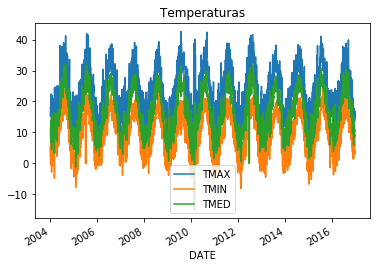

In [121]:
data.plot(y=['TMAX','TMIN','TMED'])
plt.title('Temperaturas')

## Cajas

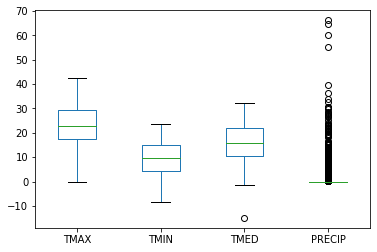

In [122]:
data.loc[:,'TMAX':'PRECIP'].plot.box()

In [123]:
group_daily = data.groupby(['month',data.index.day])
daily_agg = group_daily.agg({ 'TMED':'mean', 'TMAX':'max','TMIN':'min','PRECIP':'mean'})
daily_agg.head()

TMED  TMAX  TMIN    PRECIP
month DATE                                
1     1     8.992308  20.6  -1.6  0.076923
      2     9.000000  20.9  -3.0  0.046154
      3     8.553846  21.0  -1.6  0.661538
      4     8.815385  22.8  -0.6  0.400000
      5     8.461538  21.7  -1.0  0.369231

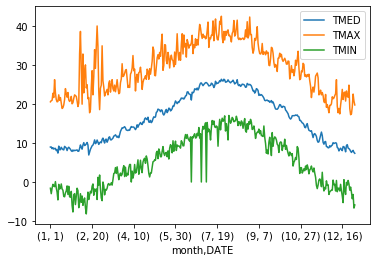

In [124]:
daily_agg.plot(y=['TMED','TMAX','TMIN'])

In [125]:
from pandas.plotting import scatter_matrix

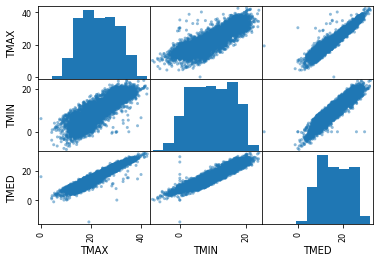

In [126]:
axes = scatter_matrix(data.loc[:,'TMAX':'TMED'])

## Ejercicio de analisis de datos con pandas

In [127]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [128]:
model = pd.read_csv(
    "data/model.txt",
    delim_whitespace=True,
    skiprows=3,
    parse_dates = {'Timestamp':[0,1]},
    index_col='Timestamp'
)

In [129]:
model.head()

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0
1984-01-01 03:00:00,20.4,244,7.5,1.24,1001.5,0.05,86.2
1984-01-01 04:00:00,20.3,245,7.5,1.24,1001.2,0.05,85.6
